<h1>대상 코드 (2023.03.03.)</h1>

In [75]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

def find_random_state() :
    target_score = 0.9385964912280702
    
    for random_state in range(50):
        X_train, X_test, y_train, y_test = train_test_split(df_data, df_labels, test_size=0.2, random_state=random_state)
        
        mymodel = KNeighborsClassifier(n_neighbors=3)
        mymodel.fit(X_train, y_train.values.ravel())
        
        score = mymodel.score(X_test, y_test)
        
        if (round(score, 16) == target_score) :
            target_random_state = random_state
            return target_random_state
            break
            
        else :
            continue
        
breast_cancer_data = load_breast_cancer()

df_features = breast_cancer_data.feature_names
df_data = pd.DataFrame(breast_cancer_data.data, columns=df_features)
df_labels = pd.DataFrame(breast_cancer_data.target)

df_data.sample(n = 10)
df_labels.sample(n = 10)

X_train, X_test, y_train, y_test = train_test_split(df_data, df_labels, test_size=0.2, random_state=find_random_state())

print("X_train.shape :", X_train.shape)
print("y_train.shape :", y_train.shape)
print("X_test.shape :", X_test.shape)
print("y_test.shape :", y_test.shape)

mymodel = KNeighborsClassifier(n_neighbors=3)
mymodel.fit(X_train, y_train.values.ravel())

# 예측
prediction = mymodel.predict(X_test)

print(mymodel.score(X_test, y_test))

X_train.shape : (455, 30)
y_train.shape : (455, 1)
X_test.shape : (114, 30)
y_test.shape : (114, 1)
0.9385964912280702


<h1>hw</h1>

<h3>데이터 내용 확인</h3>

In [76]:
df_data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<h4>column별 히스토그램</h4>

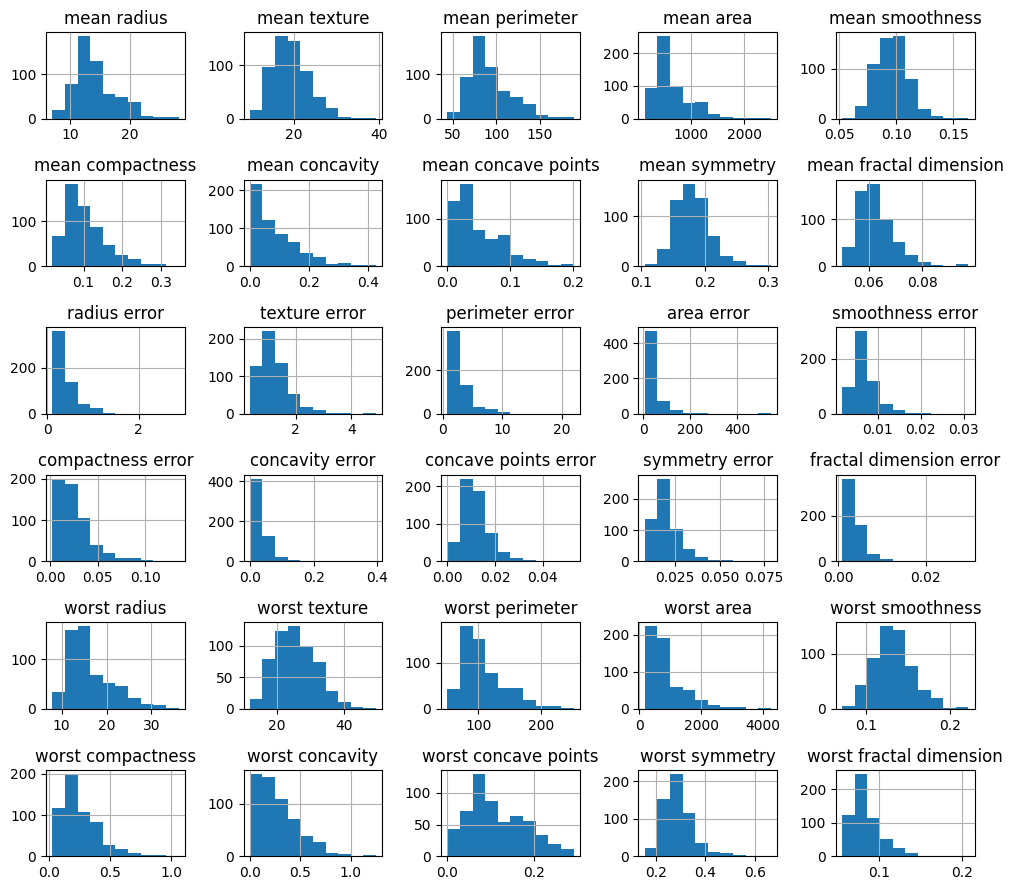

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

df_data.hist(figsize=(10, 9))
plt.tight_layout()
plt.show()

<h3>결측치 / 이상치 제거</h3>

<h4>결측치 여부 확인</h4>

In [78]:
df_data.isnull().sum()

## 결측치 없음
## 만약 결측치가 있다면 DataFrame.dropna()을 사용하여 제거 가능

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

<h4>이상치 여부 확인</h4>

<Axes: >

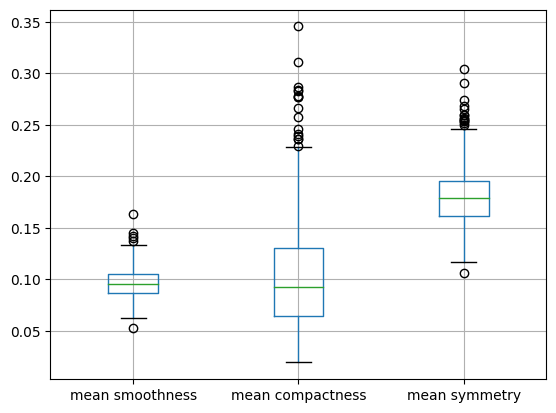

In [79]:
import matplotlib.pyplot as plt
import pandas as pd

## 가시성을 위해 임의의 column을 선정하여 진행
df_data.boxplot(column=['mean smoothness','mean compactness', 'mean symmetry'])

array([[<Axes: title={'center': 'mean smoothness'}>,
        <Axes: title={'center': 'mean compactness'}>],
       [<Axes: title={'center': 'mean symmetry'}>, <Axes: >]],
      dtype=object)

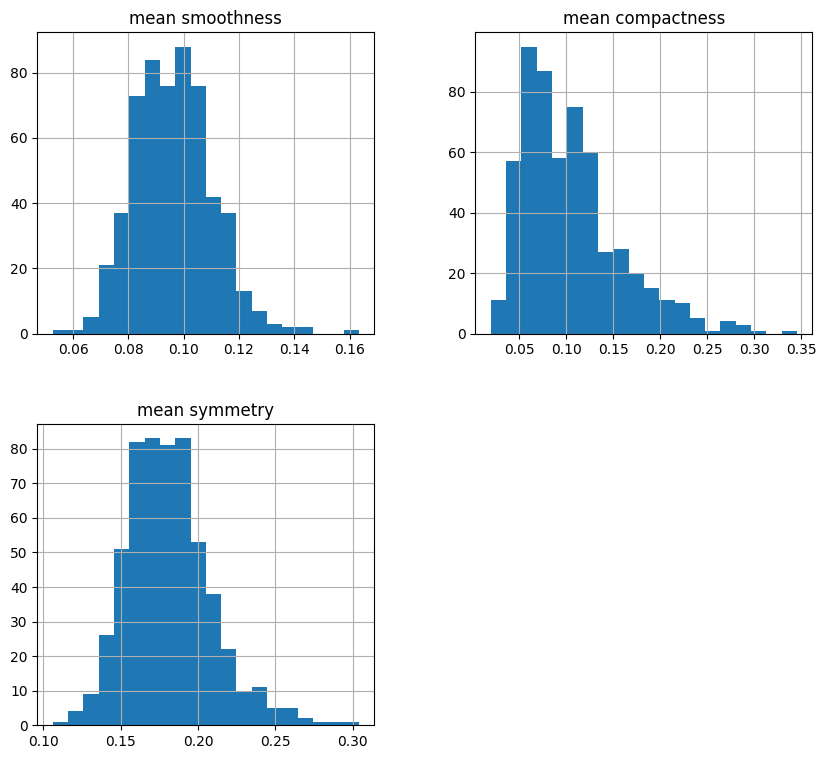

In [80]:
before_IQR = df_data[['mean smoothness','mean compactness', 'mean symmetry']]
before_IQR.hist(bins=20, figsize=(10, 9))

<h3>이상치 제거 (Inter-Quartile Range 기법 사용)</h3>

In [81]:
## IQR = Q3(3사분위수) - Q1(1사분위수)
## 제거기준 = (Q3 + IQR * 1.5 보다 큰 값) & (Q1 - IQR * 1.5 보다 작은 값)
Q1 = df_data[['mean smoothness','mean compactness', 'mean symmetry']].quantile(q=0.25)
Q3 = df_data[['mean smoothness','mean compactness', 'mean symmetry']].quantile(q=0.75)

IQR = Q3 - Q1

print(Q1)
print(Q3)
print(IQR)

mean smoothness     0.08637
mean compactness    0.06492
mean symmetry       0.16190
Name: 0.25, dtype: float64
mean smoothness     0.1053
mean compactness    0.1304
mean symmetry       0.1957
Name: 0.75, dtype: float64
mean smoothness     0.01893
mean compactness    0.06548
mean symmetry       0.03380
dtype: float64


In [82]:
after_IQR = df_data[(df_data['mean smoothness'] <= Q3['mean smoothness'] + 1.5 * IQR['mean smoothness']) & (df_data['mean smoothness'] >= Q1['mean smoothness'] - 1.5 * IQR['mean smoothness'])]
after_IQR = after_IQR[(after_IQR['mean compactness'] <= Q3['mean compactness'] + 1.5 * IQR['mean compactness']) & (after_IQR['mean compactness'] >= Q1['mean compactness'] - 1.5 * IQR['mean compactness'])]
after_IQR = after_IQR[(after_IQR['mean symmetry'] <= Q3['mean symmetry'] + 1.5 * IQR['mean symmetry']) & (after_IQR['mean symmetry'] >= Q1['mean symmetry'] - 1.5 * IQR['mean symmetry'])]
after_IQR = after_IQR[['mean smoothness','mean compactness', 'mean symmetry']]

print('before_IQR : ', len(before_IQR))
print('after_IQR : ', len(after_IQR))

## 이상치 30개 제거

before_IQR :  569
after_IQR :  539


<h3>이상치 제거 이후 히스토그램</h3>

<Axes: >

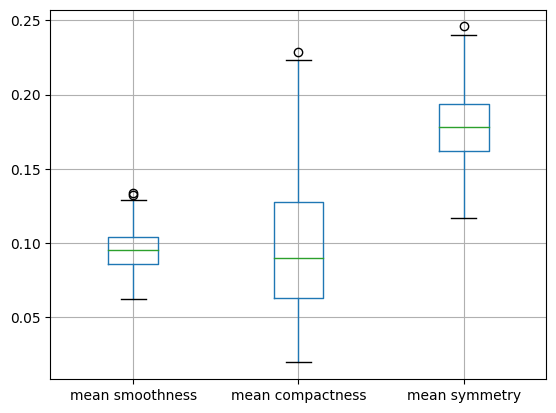

In [91]:
after_IQR.boxplot()

array([[<Axes: title={'center': 'mean smoothness'}>,
        <Axes: title={'center': 'mean compactness'}>],
       [<Axes: title={'center': 'mean symmetry'}>, <Axes: >]],
      dtype=object)

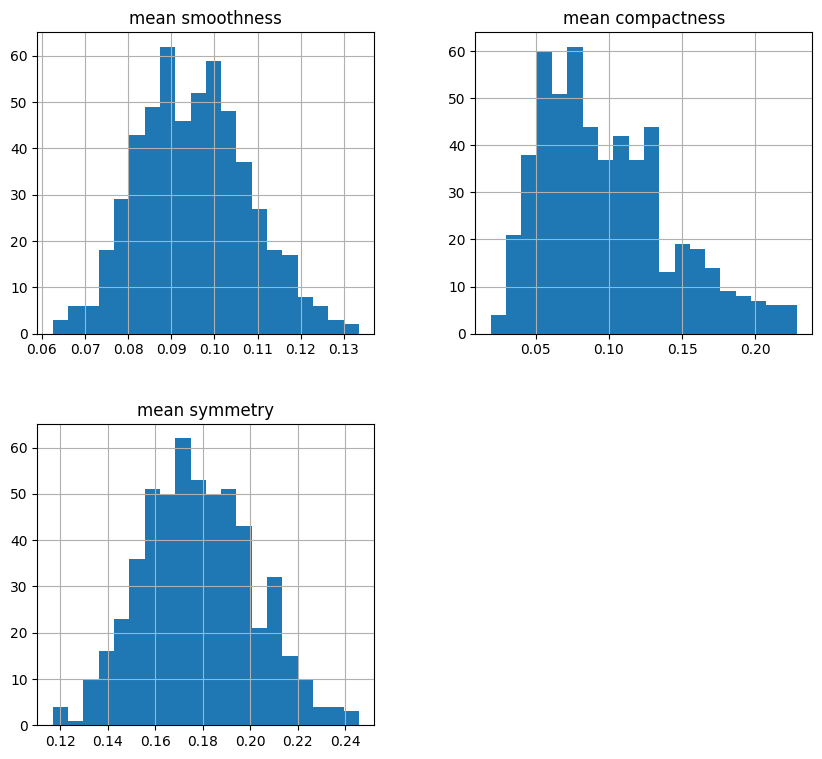

In [93]:
after_IQR.hist(bins=20, figsize=(10, 9))

<h3>seaborn library 실습</h3>

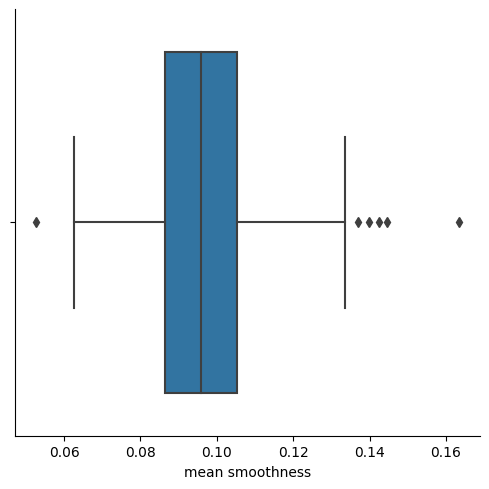

In [83]:
import seaborn as sns

sns.catplot(kind='box', x='mean smoothness', data=df_data)

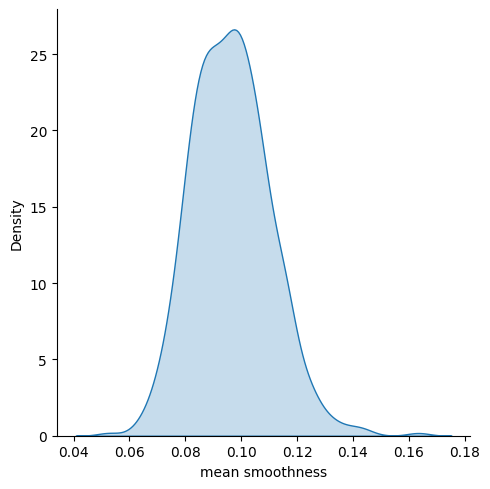

In [84]:
sns.displot(kind='kde', x='mean smoothness', data=df_data, fill=True)

<h3>데이터 전처리 (Scaling)</h3>

<h5>min-max-normalization</h5>

In [85]:
## 의도적으로 processing module을 사용하지 않은 2022.03.03.의 과제
min_X_train = X_train.min(axis=0)
max_X_train = X_train.max(axis=0)
scaled_X_train = (X_train - min_X_train) / (max_X_train - min_X_train)

min_X_test = X_test.min(axis=0)
max_X_test = X_test.max(axis=0)
scaled_X_test = (X_test - min_X_test) / (max_X_test - min_X_test)

print(scaled_X_train.shape)
print(scaled_X_test.shape)

(455, 30)
(114, 30)


In [86]:
## processing module을 활용
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_X_train = scaler.fit_transform(X_train)
print(scaled_X_train.shape)

scaled_X_test = scaler.transform(X_test)
print(scaled_X_test.shape)

(455, 30)
(114, 30)


In [87]:
scaled_model = KNeighborsClassifier(n_neighbors=3)
scaled_model.fit(scaled_X_train, y_train.values.ravel())
prediction = scaled_model.predict(scaled_X_test)

scaled_accuracy = scaled_model.score(scaled_X_test, y_test)

print(scaled_accuracy)

0.9649122807017544


<h5>z-score-normalization</h5>

In [88]:
## 의도적으로 processing module을 사용하지 않은 2022.03.03.의 과제
import numpy as np

mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

z_scaled_X_train = (X_train - mean) / std
z_scaled_X_test = (X_test - mean) / std

print(z_scaled_X_train.shape)
print(z_scaled_X_test.shape)

(455, 30)
(114, 30)


In [89]:
## processing module을 활용
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

z_scaled_X_train = scaler.transform(X_train)
z_scaled_X_test = scaler.transform(X_test)

print(z_scaled_X_train.shape)
print(z_scaled_X_test.shape)

(455, 30)
(114, 30)


In [90]:
z_scaled_model = KNeighborsClassifier(n_neighbors=3)
z_scaled_model.fit(z_scaled_X_train, y_train.values.ravel())
prediction = z_scaled_model.predict(z_scaled_X_test)

z_scaled_accuracy = z_scaled_model.score(z_scaled_X_test, y_test)

print(z_scaled_accuracy)

0.9649122807017544
